# Import

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

# Load the data
df = pd.read_csv('/content/drive/MyDrive/MOVIES/AllClean2.csv')

print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
       id                   title      budget     revenue  runtime  Drama  \
0   10060  Get Rich or Die Tryin'  40000000.0  46442528.0    117.0      1   
1   70586                   Setup  20000000.0   2128186.0     85.0      1   
2    9358     Final Destination 2  26000000.0  90941129.0     90.0      0   
3  512096                    Cake    350000.0    850000.0    125.0      1   
4  512096                    Cake    350000.0    850000.0    125.0      1   

   Comedy  Action  Thriller  Romance  ...  competitors  genre_competition  \
0       0       0         0        0  ...           14                  1   
1       0       1         0        0  ...           28                  2   
2       0       0         0        0  ...           15                  2   
3       0       0         0        1  ...           29                  2   
4       0       0      

# Preprocessing And Split

In [ ]:
# Drop unnecessary columns
df.drop(columns=['revenue_to_budget_ratio', 'title'], inplace=True)
X = df.drop(columns=['revenue'])
y = df['revenue']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree

In [ ]:
# Initialize and train the decision tree regressor
dt = DecisionTreeRegressor(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# MSE calculation
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Print MSE
print(f"Training Mean Squared Error: {train_mse}")
print(f"Testing Mean Squared Error: {test_mse}")

Training Mean Squared Error: 1.0604010074897292e+16
Testing Mean Squared Error: 1.3445953311194512e+16


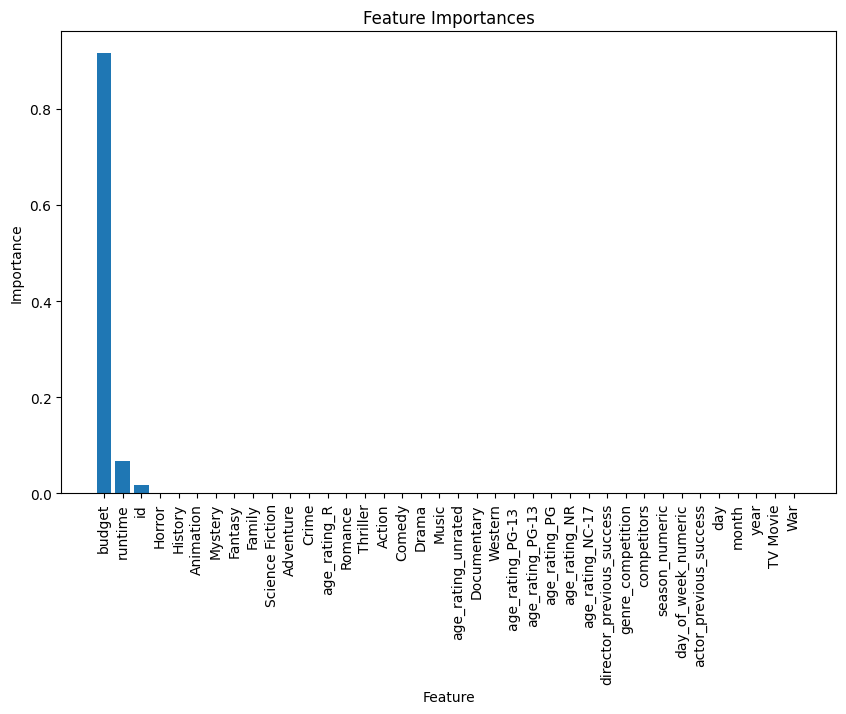

In [ ]:
feature_importances = dt.feature_importances_
features = X.columns

# Create a bar plot for the feature importances
sorted_indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center')
plt.xticks(range(len(feature_importances)), [features[i] for i in sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

# Bagging (Linear Regression Base)

In [ ]:
# initially use a decision tree base but got an overfitted model. Changed to a linear regression base

bagging_model = BaggingRegressor(base_estimator=LinearRegression(), n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)

# Make predictions and evaluate
y_train_pred = bagging_model.predict(X_train)
y_test_pred = bagging_model.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Training Mean Squared Error:", train_mse)
print("Testing Mean Squared Error:", test_mse)

Training Mean Squared Error: 1.121095809920521e+16
Testing Mean Squared Error: 1.2837870078937718e+16


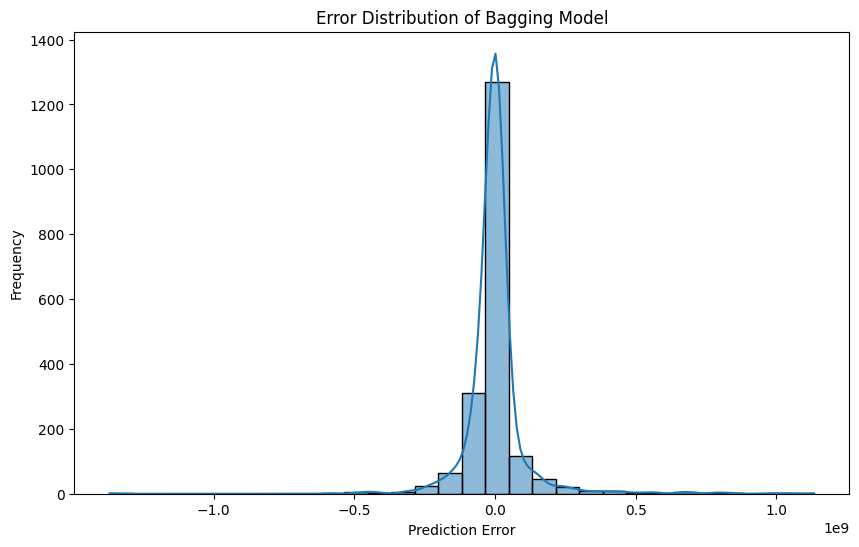

In [ ]:
from sklearn.metrics import mean_squared_error

predictions = bagging_model.predict(X_test)
errors = y_test - predictions

plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True)
plt.title('Error Distribution of Bagging Model')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

# Random Forest

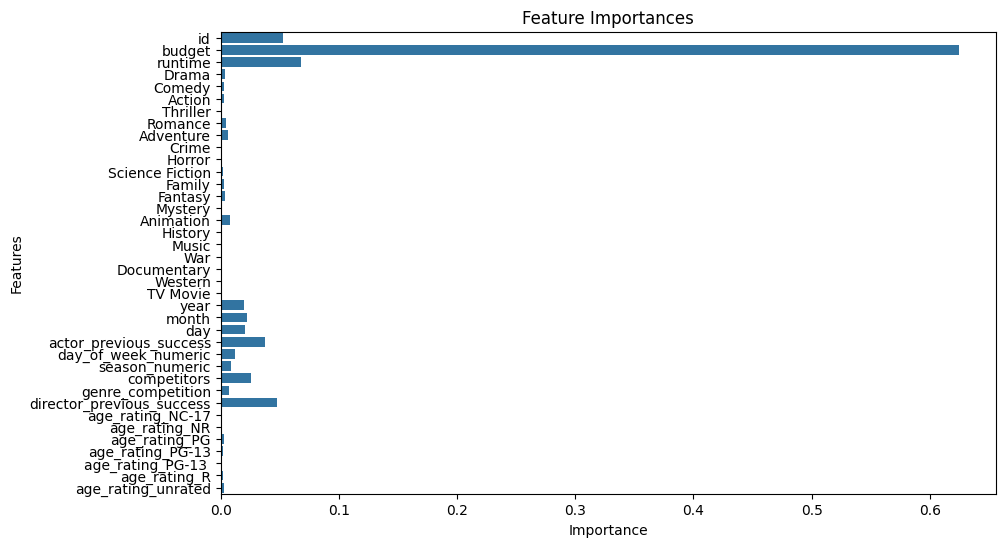

Training Mean Squared Error: 2669992095058304.5
Testing Mean Squared Error: 1.1841066017810592e+16


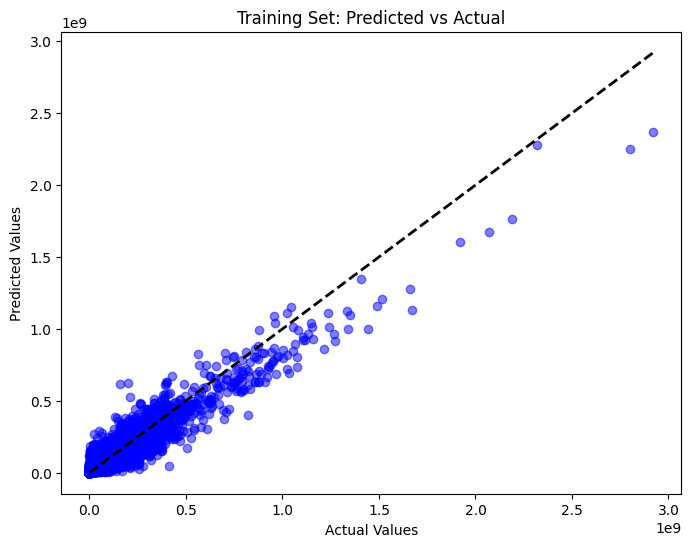

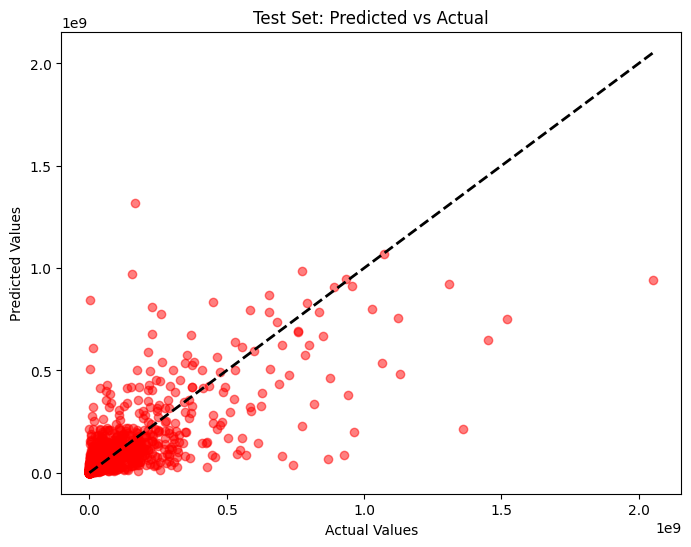

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],  # Range of number of trees
    'max_depth': [None, 10],    # Limits on tree depth
    'min_samples_split': [2, 5] # Minimum number of samples required to split an internal node
}

# Create a Random Forest model
rf = RandomForestRegressor(random_state=42)

# Perform grid search with parallel processing
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_rf = grid_search.best_estimator_

# Visualize feature importances
feature_importances = best_rf.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, orient='h')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Make predictions on the training and test sets
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Calculate the training and testing MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Training Mean Squared Error:", train_mse)
print("Testing Mean Squared Error:", test_mse)

# Visualize the predicted vs actual values for the training set
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Training Set: Predicted vs Actual')
plt.show()

# Visualize the predicted vs actual values for the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='red', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Set: Predicted vs Actual')
plt.show()